<a href="https://colab.research.google.com/github/i-am-U-hyUn/data-science/blob/main/02_week_mission_booster_ipynb%EC%9D%98_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2주차 미션 소개 - EDA를 통한 머신러닝에 영향을 미치는 주요 변수 확인하기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
df["TotalCharges"].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 110.0+ KB


## 미션 1 -  전체 수치 변수를 정답인 이탈 여부로 시각화하고 분석하기


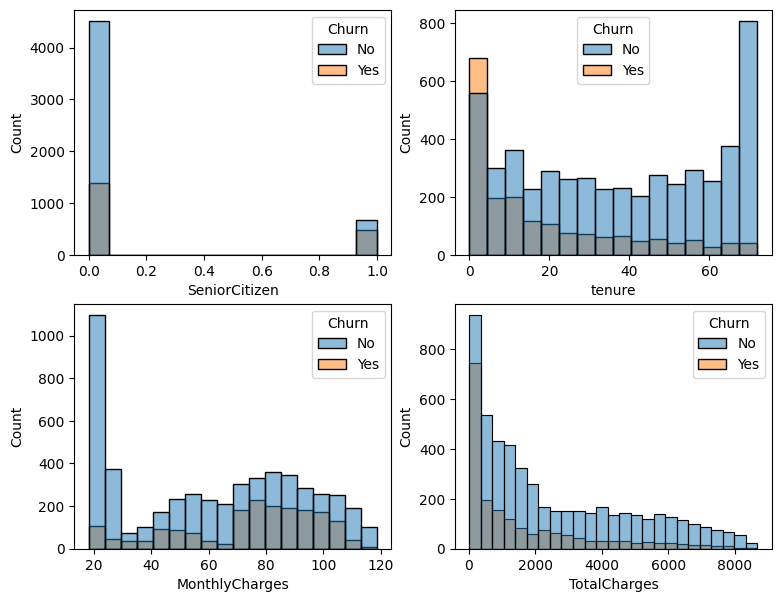

In [ ]:
# 위 예시처럼 수치 변수에 대한 히스토그램을 정답값으로 색상을 다르게 하여 히스토그램으로 시각화 해주세요.
num_col = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,7))
for n, column in enumerate(num_col):
  row = n // 2
  col = n % 2
  sns.histplot(data=df, x=column, hue = "Churn", ax=ax[row][col])

Tenure과 TotalCharges는 적을수록 Churn(고객 이탈)을 한 사람들이 많았다.
반면 MonthlyCharges에서는 대략 70이 넘어가는 시점부터 110정도까지 고객 이탈이 확연하게 늘어났다.

## 미션 2 - 주요 범주형 변수와 정답 값 비교하기


In [ ]:
nunique = df.nunique()
category_col = nunique[nunique < 5]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [ ]:
category_col_name = category_col.index.tolist()
category_col_name

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

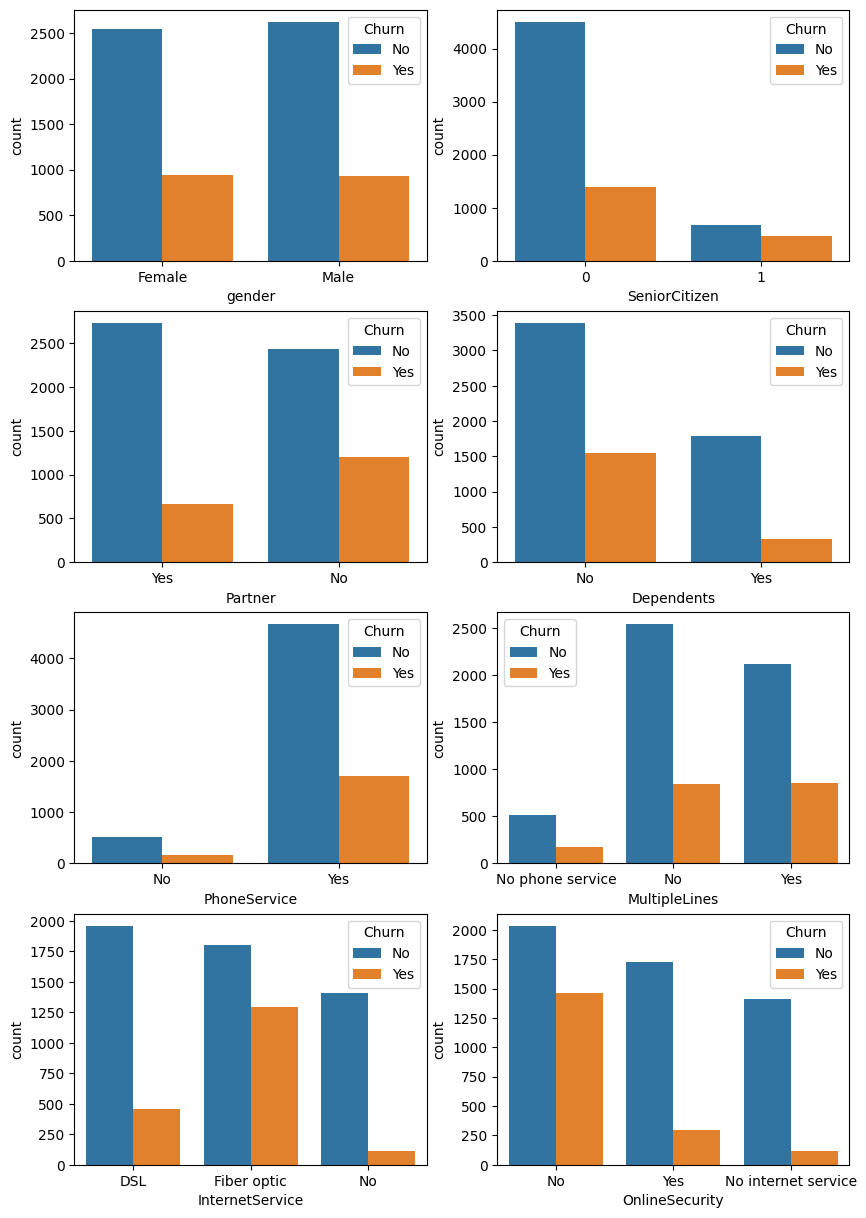

In [ ]:
# 다음의 코드를 실행하면 범주형 변수를 볼 수 있습니다.
# 위 예시처럼 시각화를 여기에 구현해 주세요.
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (10,15))
for n, column in enumerate(category_col_name[:8]):
  row = n // 2
  col = n % 2
  sns.countplot(data=df, x=column, hue="Churn", ax=ax[row][col])

Partner와 Dependents가 없는 경우 있는 경우에 비해 이탈하는 수가 많이 늘었다. 또한 Fiber Optic 인터넷 서비스를 이용하는 경우에도 다른 DSL이나 인터넷 서비스를 이용하지 않는 경우보다 훨씬 이탈 수가 많았다. 그리고 마지막으로 online security를 사용하지 않는 경우 사용하거나 인터넷 서비스 자체가 없는 경우보다 이탈하는 수가 훨씬 많은 것을 알 수 있다.

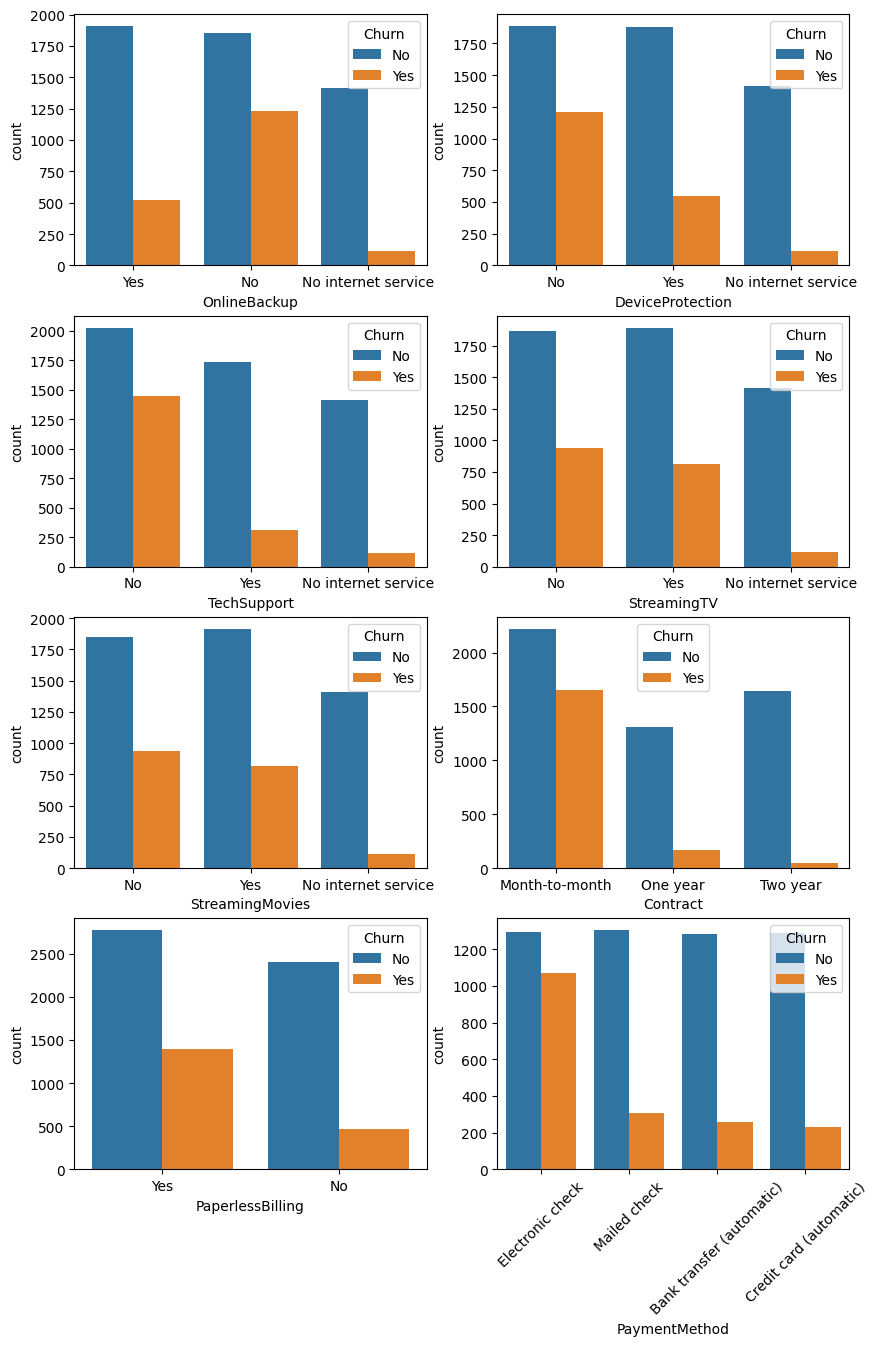

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (10,15))
for n, column in enumerate(category_col_name[8:-1]):
  row = n // 2
  col = n % 2
  sns.countplot(data=df, x=column, hue="Churn", ax=ax[row][col])
  plt.xticks(rotation=45)

Online Backup, Device Protection, Tech Support가 없는 경우 있거나 인테넷 서비스가 없는 경우보다 이탈 수가 훨씬 많았으며 Contract기준으로는 매달 계약이 1년이나 2년 계약에 비해 이탈 수가 많았다. 또한 PaperlessBilling인 경우가 아닌 경우보다 이탈 수가 많았으며 PaymentMethod에서는 Electronic check일 경우 다른 방법들에 비해 월등히 많은 이탈 수를 보여준다.

## 미션 3 - 수치변수 간의 관계를 파악하기 위해 그래프를 시각화 하고 상관계수를 구해주세요.

In [ ]:
pair_col = ["SeniorCitizen", "tenure", "MonthlyCharges", "Churn"]

In [ ]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.
df_corr = df[pair_col[:-1]].corr()
df_corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<Axes: >

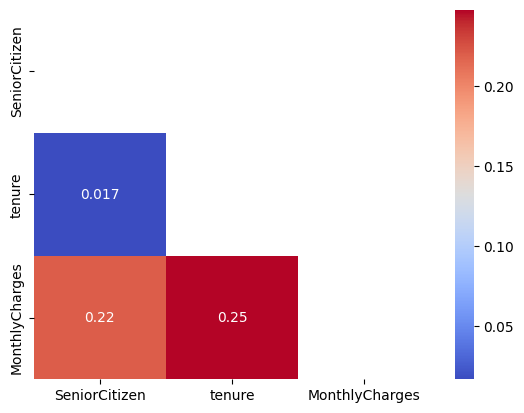

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(data=df_corr, cmap="coolwarm", annot=True, mask=mask)

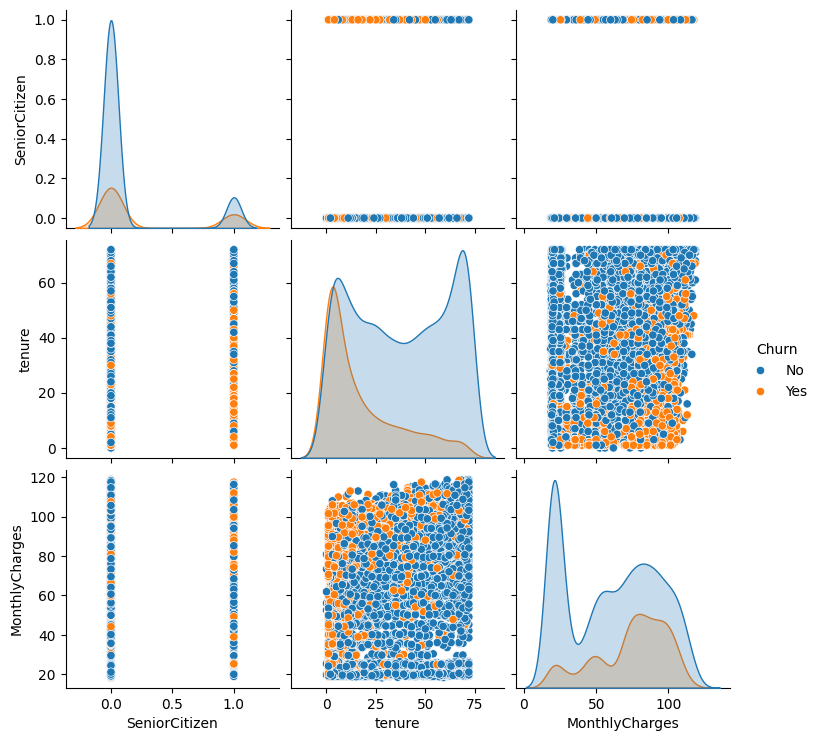

In [ ]:
# seaborn 의 pairplot 으로 이탈여부(Churn)에 따라 시각화 해주세요.
sns.pairplot(data=df[pair_col], hue="Churn")